## Loss Functions

In this assignment, we will learn about loss functions. We will use a create a neural network and measure the model's performance using different loss functions.

In [40]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_rows', 100)

In [41]:
housing = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/housing.csv')

In [42]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will use the dataset above to predict housing prices using various features about each house. Our first step is to check for missing data. 

In [43]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
    
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

In [44]:
# Answer below:
missing = missingness_summary(housing)
missing[missing > 0]

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtFinType2     2.602740
BsmtExposure     2.602740
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

Remove columns that contain more than 30% of missing data. After removing those columns, remove the rows that contain at least one observation that is missing.

In [45]:
# Answer below:
drop_cols = missing[missing >=3]
hd = housing.drop(columns = drop_cols.keys()).dropna()


In [46]:
missingness_summary(hd)

Id               0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
TotalBsmtSF      0.0
3SsnPorch        0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageArea       0.0
GarageCars       0.0
Fireplaces       0.0
EnclosedPorch    0.0
BsmtUnfSF        0.0
BsmtFinSF2       0.0
BsmtFinType2     0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
OverallQual      0.0
LotConfig        0.0
LandContour      0.0
LotShape         0.0
Street           0.0
LotArea      

There are some categorical variables that contain numeric data and some that do not. Print the type of each column to first see whether there is an issue with misclassification of column type.

In [47]:
hd.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [48]:
 print(type(hd['SalePrice'][0]))

<class 'numpy.int64'>


In [49]:
# Answer below:
obj = hd.dtypes[hd.dtypes == object].keys()

for col in obj:
  print(f" {col}: {type(hd[col][0])}, {hd[col][0]}")

 MSZoning: <class 'str'>, RL
 Street: <class 'str'>, Pave
 LotShape: <class 'str'>, Reg
 LandContour: <class 'str'>, Lvl
 Utilities: <class 'str'>, AllPub
 LotConfig: <class 'str'>, Inside
 LandSlope: <class 'str'>, Gtl
 Neighborhood: <class 'str'>, CollgCr
 Condition1: <class 'str'>, Norm
 Condition2: <class 'str'>, Norm
 BldgType: <class 'str'>, 1Fam
 HouseStyle: <class 'str'>, 2Story
 RoofStyle: <class 'str'>, Gable
 RoofMatl: <class 'str'>, CompShg
 Exterior1st: <class 'str'>, VinylSd
 Exterior2nd: <class 'str'>, VinylSd
 MasVnrType: <class 'str'>, BrkFace
 ExterQual: <class 'str'>, Gd
 ExterCond: <class 'str'>, TA
 Foundation: <class 'str'>, PConc
 BsmtQual: <class 'str'>, Gd
 BsmtCond: <class 'str'>, TA
 BsmtExposure: <class 'str'>, No
 BsmtFinType1: <class 'str'>, GLQ
 BsmtFinType2: <class 'str'>, Unf
 Heating: <class 'str'>, GasA
 HeatingQC: <class 'str'>, Ex
 CentralAir: <class 'str'>, Y
 Electrical: <class 'str'>, SBrkr
 KitchenQual: <class 'str'>, Gd
 Functional: <class 'str

We see that month sold and year sold are not variables that describe a feature of the house. While they do have relevance if we create a model containing a time series element, we will not include them here. Drop these columns. Also, remove the id column

In [50]:
# Answer below
hd = hd.drop(columns=['MoSold', 'YrSold'])
hd = hd.drop(columns=['Id'])
hd.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,WD,Normal,250000


Using the information about the column types, identify all the variables that will be converted into dummy variables. Include at least one numeric variable that you think should be converted as well.

In [64]:
# Answer below:
dum_col = list(obj) + ['OverallQual', 'OverallCond']

In [67]:
print(dum_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond']


Convert the columns you selected above into dummy variables

In [68]:
# Answer below:
hd_dum = pd.get_dummies(hd, columns=dum_col, drop_first=True)

In [107]:
hd_dum.head()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,60,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,20,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,60,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,70,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,60,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


Split the data into train and test with 20% of data in test.

In [70]:
y = hd_dum.SalePrice
X = hd_dum.drop(columns=['SalePrice'])

# Answer below
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create a model with 5 layers. The first layer should be a dense layer that takes in the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a linear activation for the output layer.

In [71]:
# Answer below

model = Sequential()
#One
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
#Two
model.add(Dense(16, activation='relu'))
#Three
model.add(Dense(9, activation='relu'))
#Four
model.add(Dense(3, activation='relu'))
#Five
model.add(Dense(1, activation='linear'))


Compile the model with the RMSprop optimizer and mean square error loss. Use the MSE as a metric. Set batch size to 100 and epochs to 200. Fit the model and report the results.

In [108]:
# Answer below:
model.compile(loss='MSE', optimizer='RMSProp', 
              metrics=['MSE'])


In [109]:
history = model.fit(X_train, y_train, epochs=200, batch_size=100, 
          validation_data=(X_test, y_test))

Epoch 1/200
12/12 [==============================] - 1s 21ms/step - loss: 38943593708.3077 - MSE: 38943593708.3077 - val_loss: 39142236160.0000 - val_MSE: 39142236160.0000
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 39242222040.6154 - MSE: 39242222040.6154 - val_loss: 38758481920.0000 - val_MSE: 38758481920.0000
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 37390682899.6923 - MSE: 37390682899.6923 - val_loss: 38232170496.0000 - val_MSE: 38232170496.0000
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 37680088615.3846 - MSE: 37680091766.1538 - val_loss: 37392166912.0000 - val_MSE: 37392166912.0000
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 36983305452.3077 - MSE: 36983305452.3077 - val_loss: 36414287872.0000 - val_MSE: 36414287872.0000
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 34939811840.0000 - MSE: 34939811840.0000 - val_loss: 35215724544.0000 -

In [110]:
preds = model.predict(X_test)

In [111]:
#Returns an dataframe of my predicted data, actual data, and the errors
def error_table(pred, actual):
  errs = pd.DataFrame({'prediction': pred, 'actual': actual})
  errs['err'] = pred - actual
  errs['err_size'] = abs(pred - actual)
  errs['isErr'] = np.where(errs['err_size'] > 0, 1, 0)
  return errs

In [112]:
preds = preds.reshape(preds.shape[0],)

In [113]:
errs = error_table(preds, y_test)

In [114]:
errs

,prediction,actual,err,err_size,isErr
764,181142.718750,270000,-88857.281250,88857.281250,1
890,102676.617188,122900,-20223.382812,20223.382812,1
349,368539.625000,437154,-68614.375000,68614.375000,1
198,152428.250000,104000,48428.250000,48428.250000,1
209,161029.500000,145000,16029.500000,16029.500000,1
...,...,...,...,...,...
1091,140963.250000,160000,-19036.750000,19036.750000,1
638,71582.703125,85000,-13417.296875,13417.296875,1
194,104567.703125,127000,-22432.296875,22432.296875,1
318,308471.093750,260000,48471.093750,48471.093750,1


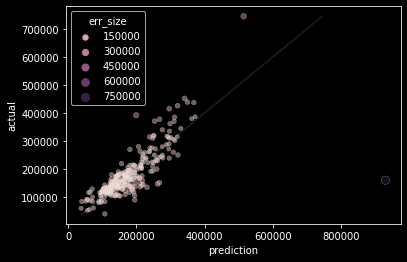

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['dark_background'])
#Provides a visualization of the errors vs. predictions (residual plot)
#Perfection!
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

Next, do the same but with mean absolute error loss. Use both MSE and MAE as metrics. Compare the results.

In [116]:
# Answer below:
model.compile(loss='MAE', optimizer='RMSProp', 
              metrics=['MAE'])

history = model.fit(X_train, y_train, epochs=200, batch_size=100, 
          validation_data=(X_test, y_test), verbose=0)

preds = model.predict(X_test)
preds = preds.reshape(preds.shape[0],)
errs = error_table(preds, y_test)

errs.head()

,prediction,actual,err,err_size,isErr
764,196628.515625,270000,-73371.484375,73371.484375,1
890,122618.117188,122900,-281.882812,281.882812,1
349,369046.218750,437154,-68107.781250,68107.781250,1
198,150240.343750,104000,46240.343750,46240.343750,1
209,165500.500000,145000,20500.500000,20500.500000,1


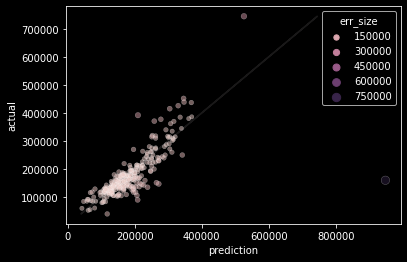

In [117]:
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

In [118]:
# Answer below:
model.compile(loss='MAE', optimizer='RMSProp', 
              metrics=['MSE'])

history = model.fit(X_train, y_train, epochs=200, batch_size=100, 
          validation_data=(X_test, y_test), verbose=0)

preds = model.predict(X_test)
preds = preds.reshape(preds.shape[0],)
errs = error_table(preds, y_test)

errs.head()

,prediction,actual,err,err_size,isErr
764,196267.140625,270000,-73732.859375,73732.859375,1
890,123055.203125,122900,155.203125,155.203125,1
349,365379.031250,437154,-71774.968750,71774.968750,1
198,140698.312500,104000,36698.312500,36698.312500,1
209,163267.984375,145000,18267.984375,18267.984375,1


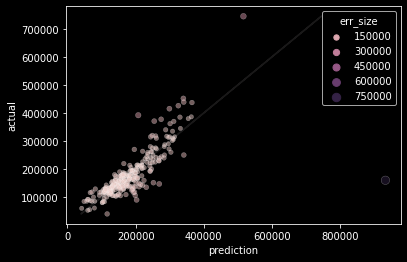

In [119]:
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

Finally, try your model using mean squared logarithmic error. Compare the results.

In [120]:
# Answer below:
# Answer below:
model.compile(loss='MAE', optimizer='RMSProp', 
              metrics=['MAE'])

history = model.fit(X_train, y_train, epochs=200, batch_size=100, 
          validation_data=(X_test, y_test), verbose=0)

preds = model.predict(X_test)
preds = preds.reshape(preds.shape[0],)
errs = error_table(preds, y_test)

errs.head()

,prediction,actual,err,err_size,isErr
764,204726.84375,270000,-65273.15625,65273.15625,1
890,123834.46875,122900,934.46875,934.46875,1
349,372110.03125,437154,-65043.96875,65043.96875,1
198,138503.50000,104000,34503.50000,34503.50000,1
209,165440.87500,145000,20440.87500,20440.87500,1


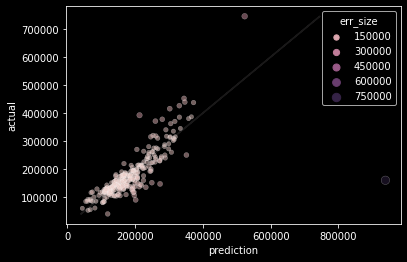

In [121]:
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()